<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/4_donut_plot_and_report/annual_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
import numpy as np

In [ ]:
os.getcwd()
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/blogs_medium')

In [ ]:
!ls

 2019_outbound.xlsx	     KGT_4class.ipynb
 4_class_dataset.zip	    'Kopie von covid-19.ipynb'
 annual_report.ipynb	     LeNet_Gridsearch_cat_dog.ipynb
 Barplot_examples.ipynb      OCR.ipynb
 binary_dataset.zip	     outbound.ipynb
 Binary_KGT.ipynb	     outbound_with_company.xlsx
 cat_dog.zip		     outbound.xlsx
 CNN_models		     Untitled0.ipynb
 coronavirus_germany.ipynb   vg2500_geo84.zip
 Gridsearch_cat_dag.ipynb    Visualization_coronavirus_germany.ipynb
 Hero2monster.ipynb


In [ ]:
df2018= pd.read_excel("outbound_with_company.xlsx",sheet_name='2018',header=0)
df2019= pd.read_excel("outbound_with_company.xlsx",sheet_name='2019',header=0)
df2020= pd.read_excel("outbound_with_company.xlsx",sheet_name='2020',header=0)
frames =[df2018, df2019,df2020]
df= pd.concat(frames)
df
os.chdir('/content')

In [ ]:
df.columns = ['date','FAW','company','type','amount','weight']
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date') 
print(df.head(2))
print(df.shape)

            FAW company     type  amount  weight
date                                            
2018-02-28  100   ID001  FDY-FDY     100  2500.0
2018-03-01  150   ID002  FDY-DTY     150  4209.6
(963, 5)


In [ ]:
month_df=df.resample('M').agg(dict(amount='sum', weight='sum')).to_period('M')
#xtick_list =list(month_df.index)

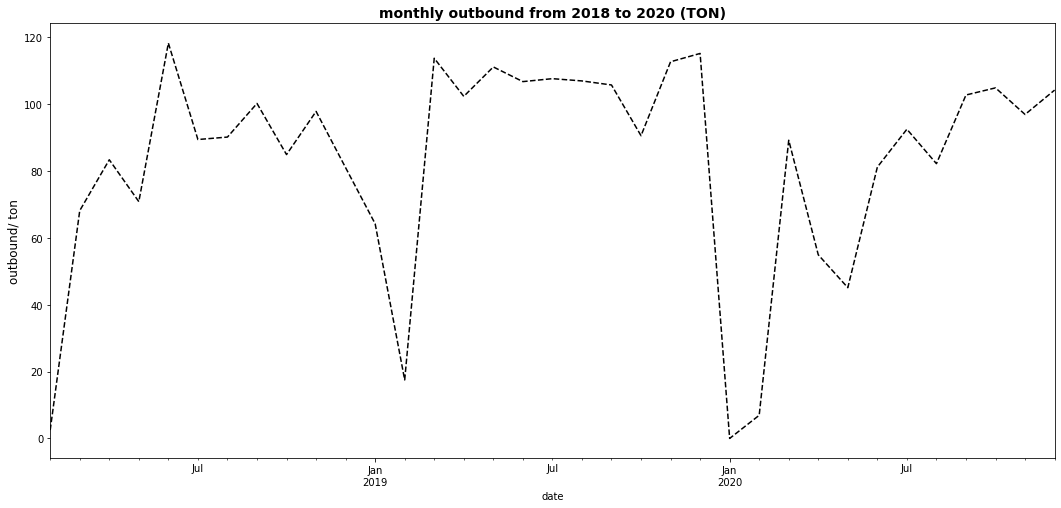

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize=(18,8))
ax= (month_df['weight']/1000).plot(style="k--", label="Series")
#ax.set_xlabel('date', fontsize=12)
ax.set_ylabel("outbound/ ton", fontsize=12)
#plt.xlim([min(xtick_list),max(xtick_list)]) 
"""
tick_spacing=2
#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
loc =plticker.MultipleLocator(tick_spacing)
ax.xaxis.set_major_locator(loc)
ax.set_xticklabels(xtick_list[::2])
"""
ax.set_title('monthly outbound from 2018 to 2020 (TON)',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
new_df=df.resample('D').sum().to_period('D')
print(new_df)
outbound=new_df.iloc[:,2]
rolls=new_df.iloc[:,1]
xlabels = new_df.index
print(xlabels)
N= len(xlabels)

            FAW  amount   weight
date                            
2018-02-28  100     100   2500.0
2018-03-01  150     150   4209.6
2018-03-02  215     180   5411.7
2018-03-03    0       0      0.0
2018-03-04    0       0      0.0
...         ...     ...      ...
2020-12-26    0       0      0.0
2020-12-27  175      15    420.0
2020-12-28    0       0      0.0
2020-12-29    0       0      0.0
2020-12-30  445     650  17200.7

[1037 rows x 3 columns]
PeriodIndex(['2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03',
             '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07',
             '2018-03-08', '2018-03-09',
             ...
             '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
             '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
             '2020-12-29', '2020-12-30'],
            dtype='period[D]', name='date', length=1037, freq='D')


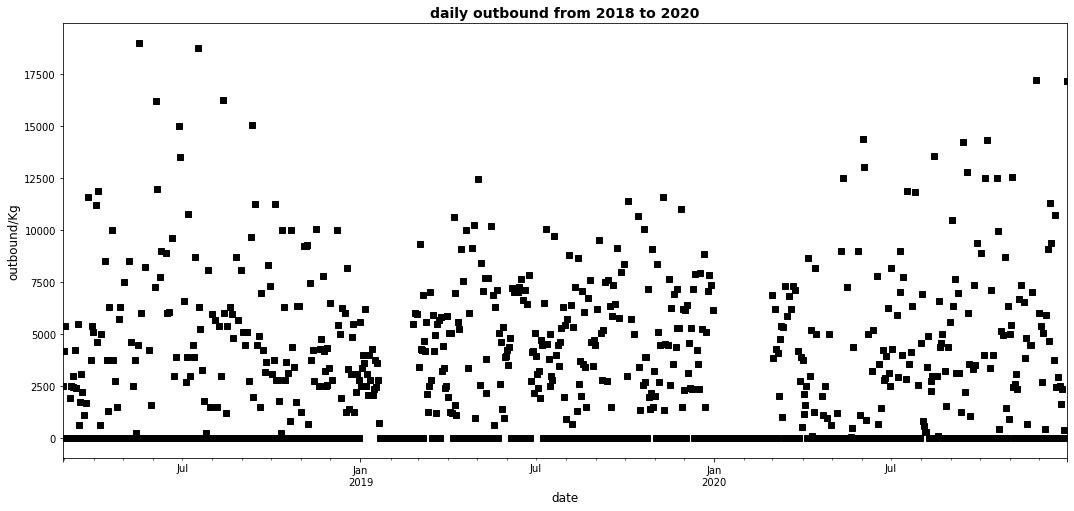

In [ ]:
interpolated = new_df.interpolate(method='linear')
fig, ax = plt.subplots(figsize=(18,8))
ax= interpolated['weight'].plot(style="ks")
ax.set_xlabel("date", fontsize=12)
ax.set_ylabel("outbound/Kg", fontsize=12)
ax.set_title('daily outbound from 2018 to 2020',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('barplot2.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
year_df = df.resample('Y').agg(dict(amount='sum', weight='sum')).to_period('Y')
year_df

,amount,weight
date,,
2018,32609,886817.1
2019,43109,1154630.2
2020,33373,860936.8


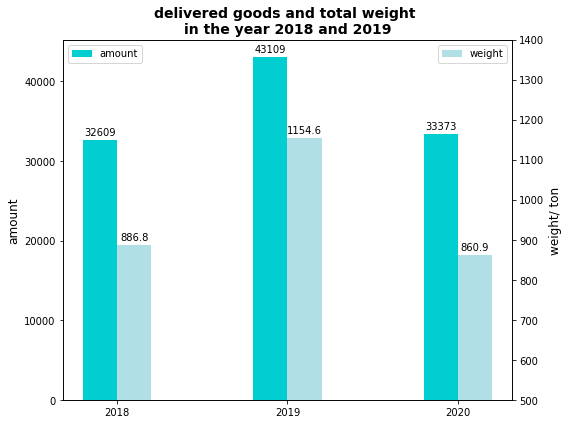

In [ ]:
labels = ['2018', '2019','2020']

x = np.arange(len(year_df))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, year_df['amount'], width, label='amount',color='#00ced1') #hatch = '/'
ax2 = ax.twinx()
rects2 = ax2.bar(x + width/2, year_df['weight']/1000, width, label='weight',color='#b0e0e6')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('amount',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_ylabel('weight/ ton',fontdict={'fontsize': 12, 'fontweight': 'medium'})
ax2.set_title('delivered goods and total weight \nfrom 2018 to 2020\n',fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_xticks(x)
ax2.set_ylim([500,1400])
ax.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False,style='plain')
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

def autolabel(rects,axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1,ax)
autolabel(rects2,ax2)
fig.tight_layout()
plt.savefig('barplot3.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
group_2018_1 = df2018.groupby('type')
print(group_2018_1.size())
group_2018_type = group_2018_1.agg(dict(amount='sum', weight='sum'))

type
FDY-DTY    126
FDY-FDY    104
dtype: int64


In [ ]:
import matplotlib
from matplotlib import cm

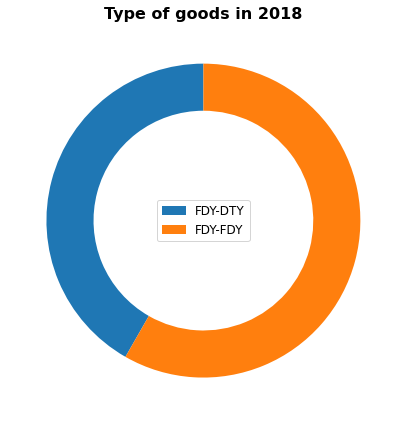

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
component = group_2018_type.index
data = group_2018_type['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("Type of goods in 2018",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
group_2018_2 = df2018.groupby('company')
print(group_2018_2.size())
group_2018_company = group_2018_2.agg(dict(amount='sum', weight='sum'))
group_2018_3 = df2018.groupby('FAW')

group_2018_faw =group_2018_3.agg(dict(amount='sum', weight='sum'))

company
ID001     25
ID002    199
ID009      1
ID013      3
ID014      2
dtype: int64


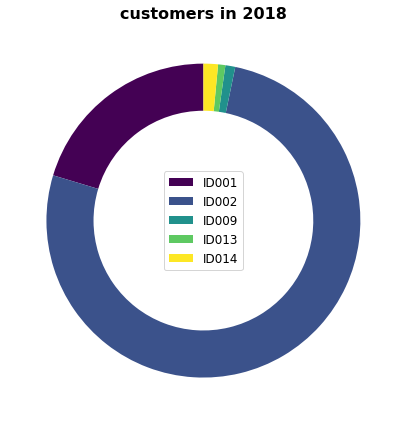

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= cm.get_cmap('viridis')(np.linspace(0, 1, 5))
component = group_2018_company.index
data = group_2018_company['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90,colors=cs_customer)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("customers in 2018",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot2.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

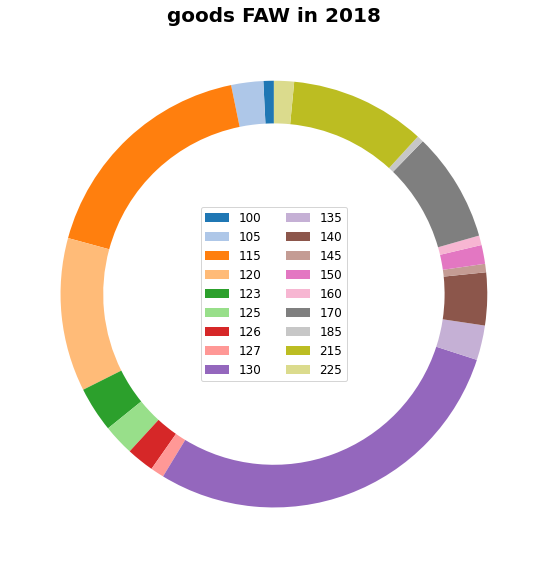

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
NUM_COLORS = 20

cs= cm.get_cmap('tab20')(np.linspace(0, 1, 20))


component = group_2018_faw.index
data = group_2018_faw['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.2), startangle=90,colors=cs)

plt.legend(wedges, component, loc="center",fontsize=12,ncol=2)

ax.set_title("goods FAW in 2018",fontdict={'fontsize': 20, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot3.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
group_2019_1 = df2019.groupby('type')
group_2019_2 = df2019.groupby('company')
group_2019_3 = df2019.groupby('FAW')
group_2019_type= group_2019_1.agg(dict(amount='sum', weight='sum'))
group_2019_company=group_2019_2.agg(dict(amount='sum', weight='sum'))
group_2019_faw=group_2019_3.agg(dict(amount='sum', weight='sum'))

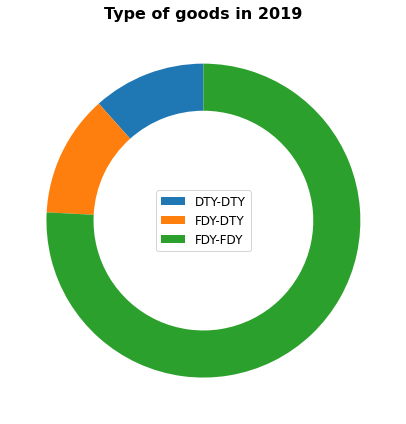

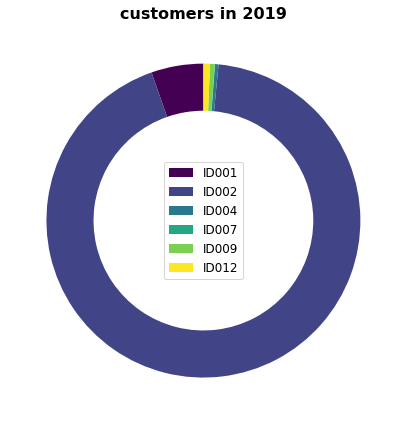

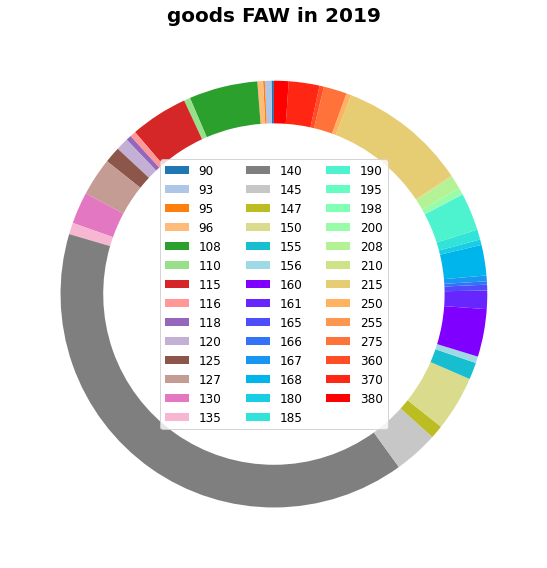

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
component = group_2019_type.index
data = group_2019_type['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("Type of goods in 2019",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot4.png',dpi=100, format='png', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
component = group_2019_company.index
data = group_2019_company['weight']
cs_customer0= cm.get_cmap('viridis')(np.linspace(0, 1, 6))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90,colors=cs_customer0)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("customers in 2019",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot5.png',dpi=100, format='png', bbox_inches='tight')
plt.show()



fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
component = group_2019_faw.index
data = group_2019_faw['weight']

colors1= cm.get_cmap('tab20')(np.linspace(0, 1, 20))
colors2= cm.get_cmap('rainbow')(np.linspace(0, 1, 21))
cs1 = np.vstack((colors1, colors2))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.2), startangle=90,colors=cs1)

plt.legend(wedges, component, loc="center",fontsize=12,ncol=3)

ax.set_title("goods FAW in 2019",fontdict={'fontsize': 20, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot6.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [ ]:
group_2020_1 = df2020.groupby('type')
group_2020_2 = df2020.groupby('company')
group_2020_3 = df2020.groupby('FAW')
print(group_2020_1.size())
print(group_2020_2.size())
group_2020_type=group_2020_1.agg(dict(amount='sum', weight='sum'))
group_2020_company=group_2020_2.agg(dict(amount='sum', weight='sum'))
group_2020_faw = group_2020_3.agg(dict(amount='sum', weight='sum'))

type
DTY-DTY     32
FDY-DTY     51
FDY-FDY    205
dtype: int64
company
ID001    137
ID002     96
ID003     11
ID004     12
ID005     15
ID006      3
ID007      1
ID008      2
ID010      4
ID011      6
ID012      1
dtype: int64


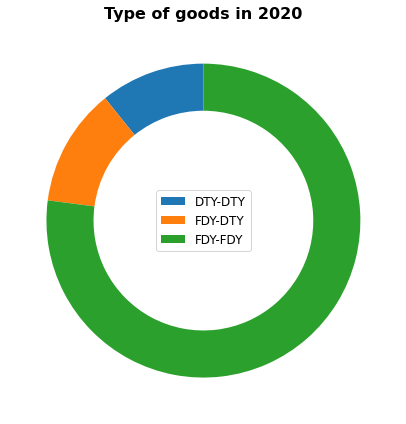

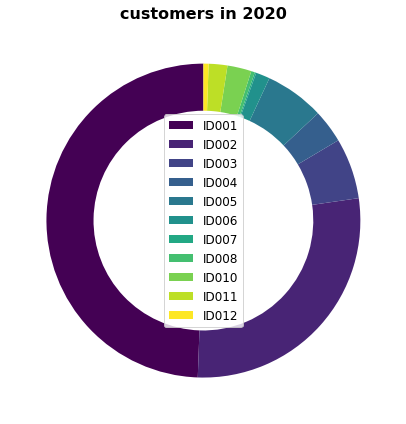

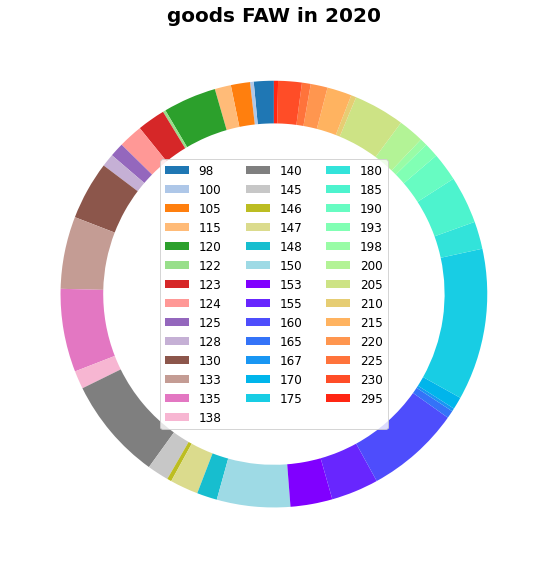

In [ ]:
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
component = group_2020_type.index
data = group_2020_type['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("Type of goods in 2020",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot7.png',dpi=100, format='png', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(aspect="equal"))
component = group_2020_company.index
data = group_2020_company['weight']
cs_customer1= cm.get_cmap('viridis')(np.linspace(0, 1, 11))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90,colors=cs_customer1)

plt.legend(wedges, component, loc="center",fontsize=12)

ax.set_title("customers in 2020",fontdict={'fontsize': 16, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot8.png',dpi=100, format='png', bbox_inches='tight')
plt.show()



fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
component = group_2020_faw.index
data = group_2020_faw['weight']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.2), startangle=90,colors=cs1)

plt.legend(wedges, component, loc="center",fontsize=12,ncol=3)

ax.set_title("goods FAW in 2020",fontdict={'fontsize': 20, 'fontweight': 'bold'})

fig.tight_layout()
plt.savefig('donutplot9.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

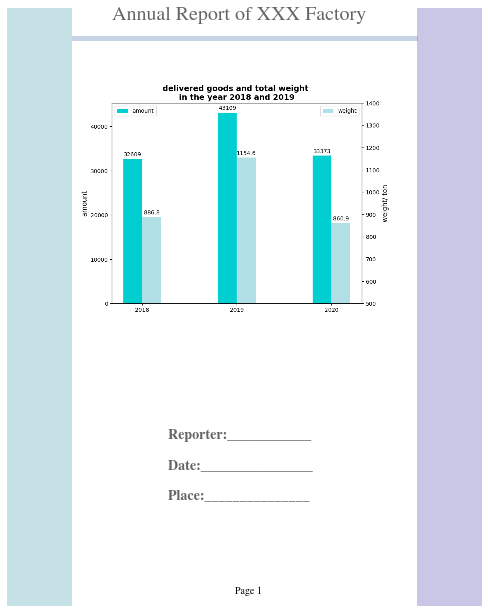

In [ ]:
# Setting style for bar graphs
import matplotlib.pyplot as plt
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'STIXGeneral'

fig, ax = plt.subplots(figsize=(8.5, 11))

# Decorative Lines
ax.axvline(x=.01, ymin=0, ymax=1, color='#44A0AD', alpha=0.3, linewidth=120)
plt.axvline(x=.99, color='#5244AD', alpha=0.3, linewidth=120)
plt.axhline(y=.95, xmin=0.14, xmax=0.86, color='#446BAD', linewidth=5,alpha=0.3)

# set background color
ax.set_facecolor('white')

# remove axes
plt.axis('off')
Header = 'Annual Report of XXX Factory'
Contact = 'Reporter:____________ \n\nDate:________________ \n\nPlace:_______________ '
page = 'Page 1'
# add text
plt.annotate(Header, (.22,.98), weight='regular', fontsize=20, alpha=.6 )
plt.annotate(Contact, (.34,.18), weight='bold', fontsize=14,alpha=.6)
plt.annotate(page, (.48,.02), weight='medium', fontsize=10)
#plt.annotate(Title, (.02,.91), weight='regular', fontsize=14)
#plt.annotate(Contact, (.7,.906), weight='regular', fontsize=8, color='#ffffff')


#add qr code
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
first_plot = mpimg.imread('barplot3.png')
imagebox1 = OffsetImage(first_plot, zoom=0.4)
a = AnnotationBbox(imagebox1, (0.48, 0.68),frameon=False)
ax.add_artist(a)
"""
second_plot = mpimg.imread('barplot.png')
imagebox2 = OffsetImage(second_plot, zoom=0.22)
b = AnnotationBbox(imagebox2, (0.5, 0.5),frameon=False)
ax.add_artist(b)
"""
plt.savefig('report_1.png', dpi=300, bbox_inches='tight')

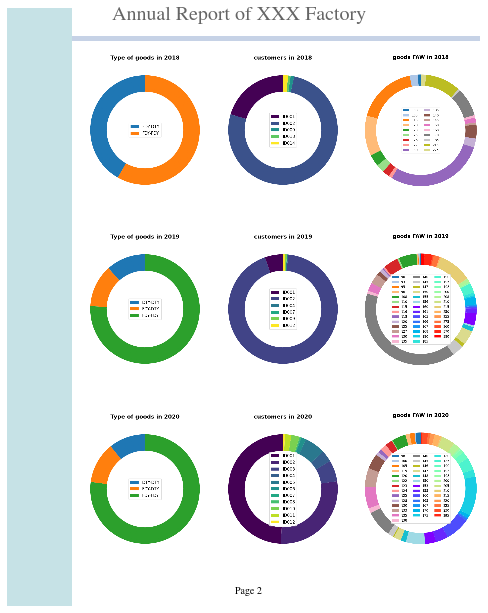

In [ ]:
# Setting style for bar graphs
import matplotlib.pyplot as plt
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'STIXGeneral'

fig, ax = plt.subplots(figsize=(8.5, 11))
page2= 'Page 2'
# Decorative Lines
ax.axvline(x=.01, ymin=0, ymax=1, color='#44A0AD', alpha=0.3, linewidth=120)
plt.axhline(y=.95, xmin=0.14, xmax=0.99, color='#446BAD', linewidth=5,alpha=0.3)
# set background color
ax.set_facecolor('white')

# remove axes
plt.axis('off')
Header = 'Annual Report of XXX Factory'
# add text
plt.annotate(Header, (.22,.98), weight='regular', fontsize=20, alpha=.6 )
plt.annotate(page2, (.48,.02), weight='medium', fontsize=10)
#plt.annotate(Title, (.02,.91), weight='regular', fontsize=14)
#plt.annotate(Contact, (.7,.906), weight='regular', fontsize=8, color='#ffffff')

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
first_plot = mpimg.imread('donutplot1.png')
imagebox1 = OffsetImage(first_plot, zoom=0.25)
a1 = AnnotationBbox(imagebox1, (0.29, 0.80),frameon=False)
ax.add_artist(a1)
second_plot = mpimg.imread('donutplot2.png')
imagebox2 = OffsetImage(second_plot, zoom=0.25)
b1 = AnnotationBbox(imagebox2, (0.58, 0.80),frameon=False)
ax.add_artist(b1)
third_plot = mpimg.imread('donutplot3.png')
imagebox3 = OffsetImage(third_plot, zoom=0.1875)
c1 = AnnotationBbox(imagebox3, (0.87, 0.80),frameon=False)
ax.add_artist(c1)

fourth_plot = mpimg.imread('donutplot4.png')
imagebox4 = OffsetImage(fourth_plot, zoom=0.25)
a2 = AnnotationBbox(imagebox4, (0.29, 0.50),frameon=False)
ax.add_artist(a2)
fifth_plot = mpimg.imread('donutplot5.png')
imagebox5 = OffsetImage(fifth_plot, zoom=0.25)
b2 = AnnotationBbox(imagebox5, (0.58, 0.50),frameon=False)
ax.add_artist(b2)
sixth_plot = mpimg.imread('donutplot6.png')
imagebox6 = OffsetImage(sixth_plot, zoom=0.1875)
c2 = AnnotationBbox(imagebox6, (0.87, 0.50),frameon=False)
ax.add_artist(c2)

seventh_plot = mpimg.imread('donutplot7.png')
imagebox7 = OffsetImage(seventh_plot, zoom=0.25)
a3 = AnnotationBbox(imagebox7, (0.29, 0.20),frameon=False)
ax.add_artist(a3)
eighth_plot = mpimg.imread('donutplot8.png')
imagebox8 = OffsetImage(eighth_plot, zoom=0.25)
b3 = AnnotationBbox(imagebox8, (0.58, 0.20),frameon=False)
ax.add_artist(b3)
ninth_plot = mpimg.imread('donutplot9.png')
imagebox9 = OffsetImage(ninth_plot, zoom=0.1875)
c3 = AnnotationBbox(imagebox9, (0.87, 0.20),frameon=False)
ax.add_artist(c3)

plt.savefig('report_2.png', dpi=300, bbox_inches='tight')